<a href="https://colab.research.google.com/github/yellayujin/mulcamp34/blob/main/Bank_Churn_Analysis_EDA%2C_T_Test%2C_and_Chi2_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Outline<a class='anchor' id='ch0'></a>
- This dataset was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.
- **The analysis is part of practicing skills learned in the 'Data Analysis & Engineering Camp (Python)'.; therefore, essential steps may have been omitted, given the focus on Exploratory Data Analysis (EDA) in 3 days.**
- As we are going to focus on EDA(Exploritory Plan Analysis), we'll look through the trian.csv which includes the target variable, 'Exited'.


### BackGround
- The recent increase in bank customer churn has created a number of problems.
- In order to minimize customer churn and increase customer retention, we are going to identify and solve various problems and even attract new customers.
- In order to identify the cause of the customer churn, we will analyze various columns and identify the problem, identify which part is the problem, and solve and supplement the problem.


## Table of Contents
- 0.[Outline](#ch0)
- 1.[Data Exploration](#ch1)
    - 1.1[Exploratory Data Analysis](#ch1.1)
    - 1.2[Churn Age Analysis](#1.2)
- 2.[Detailed Plan Establishment](#ch2)
    - 2.1[Deeper EDA](#ch2.1)
- 3.[Statistical Test](#ch3)
    - 3.1[Sampled T-test](#ch3.1)
    - 3.2[chi-square test](#ch3.2)
- 4.[Regression](#ch4)
- 5.[Conclusion](#ch5)
- 6.[Project Evaluation](#ch6)

### All the used libraries:
- pandas: 2.14
- numpy: 1.26.2
- matplotlib:3.8.0
- seaborn: 0.12.2
- scipy: 1.11.4
- sklearn: 1.3.2
- statsmodels: 0.14.0

# 1. Data Exploration <a class='anchor' id='ch1'></a>

### Data Description
- **Customer ID**: A unique identifier for each customer
- **Surname**: The customer's surname or last name
- **Credit Score**: A numerical value representing the customer's credit score
- **Geography**: The country where the customer resides
- **Gender**: The customer's gender
- **Age**: The customer's age.
- **Tenure**: The number of years the customer has been with the bank
- **Balance**: The customer's account balance
- **NumOfProducts**: The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard**: Whether the customer has a credit card
- **IsActiveMember**: Whether the customer is an active member
- **EstimatedSalary**: The estimated salary of the customer
- **Exited**: Whether the customer has churned (Target Variable)

In [ ]:
import pandas as pd
train = pd.read_csv('/kaggle/input/train-csv/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


- No null data.

In [ ]:
# Descriptive statistics for all data
continuous_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
train[continuous_var].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
NumOfProducts,165034.0,1.554455,0.547154,1.00,1.00,2.0,2.0000,4.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48


In [ ]:
# Descriptive statistics of churn
train.loc[train['Exited']==1,continuous_var].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,34921.0,652.220469,81.136331,350.00,593.00,651.00,708.00,850.00
Age,34921.0,43.958478,9.004380,18.00,38.00,44.00,50.00,92.00
Tenure,34921.0,4.914378,2.826564,0.00,3.00,5.00,7.00,10.00
Balance,34921.0,71209.978085,62646.691947,0.00,0.00,98955.87,125437.14,238387.56
NumOfProducts,34921.0,1.327854,0.661912,1.00,1.00,1.00,1.00,4.00
EstimatedSalary,34921.0,114402.496656,50542.030878,11.58,74965.44,120892.96,158750.53,199992.48


### 1.1 Exploratory Data Analysis<a class='anchor' id='ch1.1'></a>
- Before selecting our target audience, we conducted an EDA of our data.

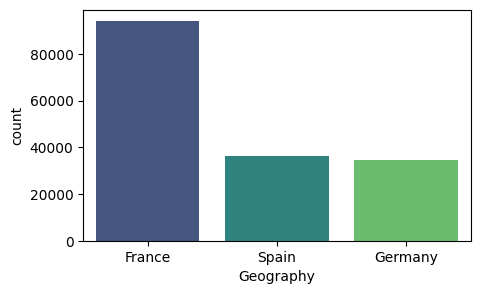

In [ ]:
# Number of customers per country
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Geography', data=train, palette='viridis')

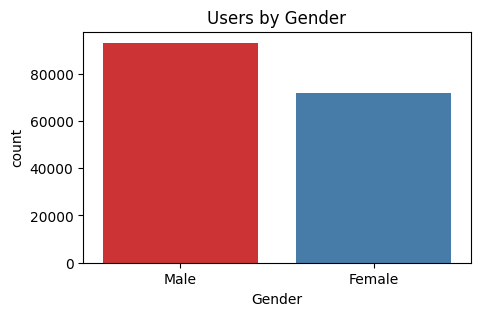

In [ ]:
# Customer distribution by gender
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=train, palette='Set1')
plt.title('Users by Gender')
plt.xlabel('Gender')
plt.show()

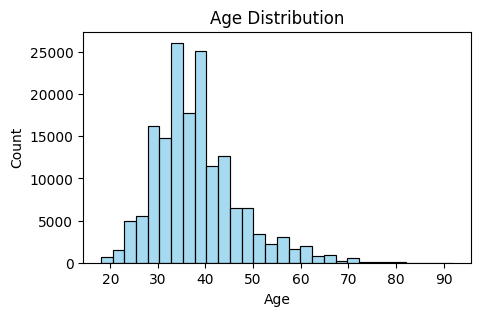

In [ ]:
# Customer distribution by age
plt.figure(figsize=(5, 3))
sns.histplot(train['Age'], bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

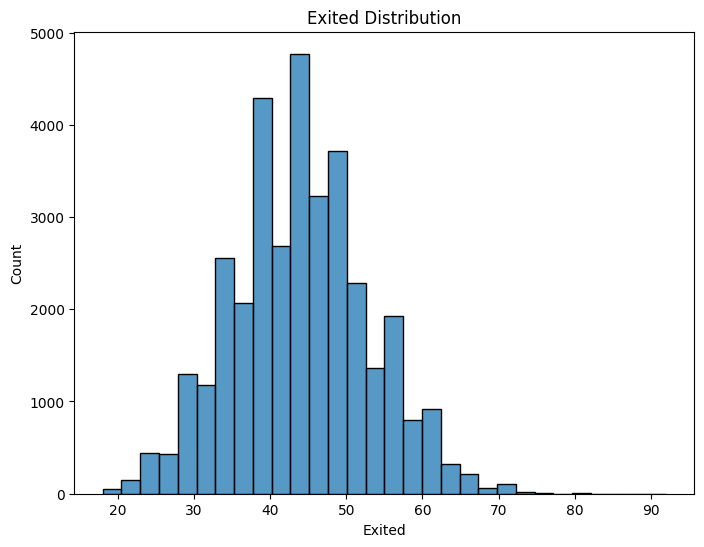

In [ ]:
# Distribution of churn by age
exited = train.loc[train['Exited']==1,:]

plt.figure(figsize=(8, 6))
sns.histplot(x='Age', data=exited, bins=30)
plt.title('Exited Distribution')
plt.xlabel('Exited')
plt.show()

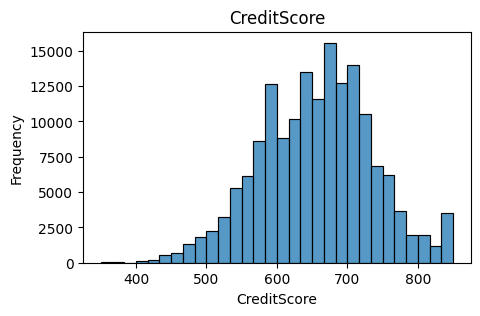

In [ ]:
# Credit score distribution
plt.figure(figsize=(5, 3))
sns.histplot(train['CreditScore'], bins=30)
plt.title('CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

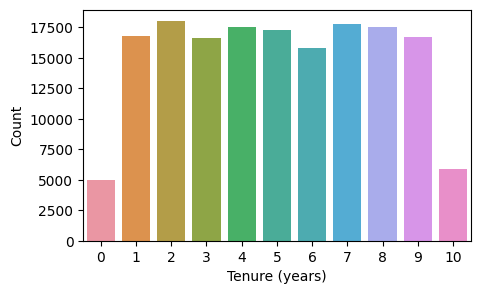

In [ ]:
# Tenure distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='Tenure', data=train)
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.show()

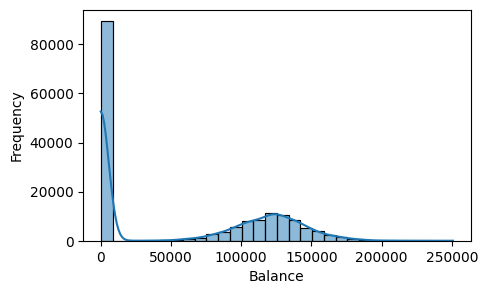

In [ ]:
# Balance distribution
plt.figure(figsize=(5, 3))
sns.histplot(train['Balance'], bins=30, kde=True)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

- There are a significant number of customers with a Balance of 0 (45.67% of the total), which may affect the analysis, so we exclude them.

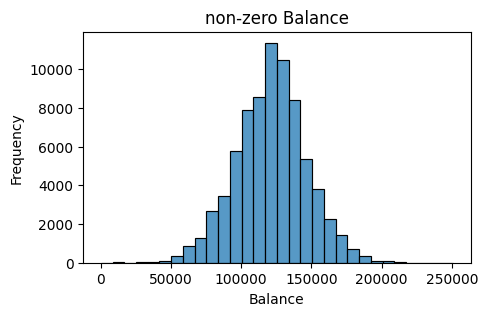

In [ ]:
# Data excluding zero balances
data = train.drop(['id', 'CustomerId', 'Surname', 'Geography'], axis=1)

data_ybal = data.loc[data['Balance'] != 0, :]
data.shape[0]
data_ybal.shape[0]

plt.figure(figsize=(5, 3))
sns.histplot(data_ybal['Balance'], bins=30)
plt.title('non-zero Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

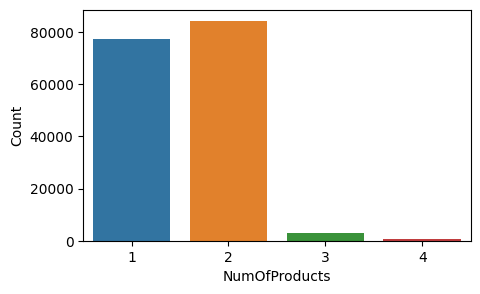

In [ ]:
# Distribution of the number of products used
plt.figure(figsize=(5, 3))
sns.countplot(x='NumOfProducts', data=train)
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()


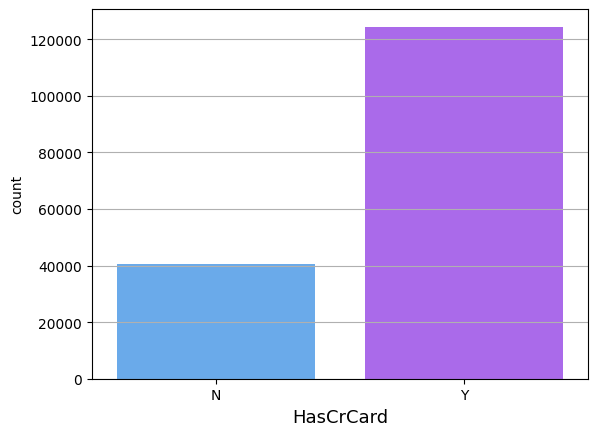

In [ ]:
# Distribution of customers with credit cards
sns.countplot(x='HasCrCard', data=train, palette='cool')

plt.grid(axis='y')
plt.xlabel('HasCrCard', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

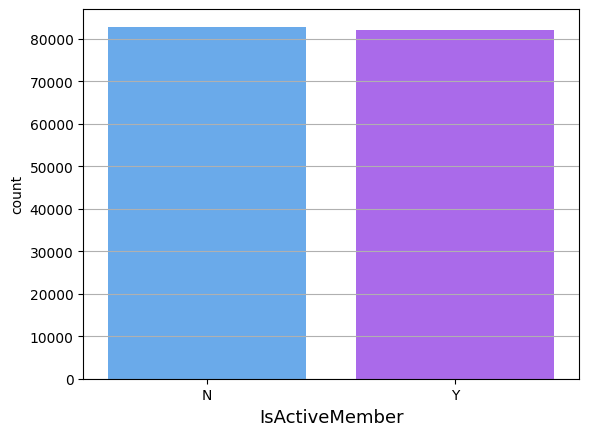

In [ ]:
# Active member distribution
sns.countplot(x='IsActiveMember', data=train, palette='cool')

plt.grid(axis='y')
plt.xlabel('IsActiveMember', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

- We can analyze the relationship with other variables to understand which factors influence customer activation.
- We also can use this information to create reward programs for loyal customers or run reactivation campaigns for inactive members.

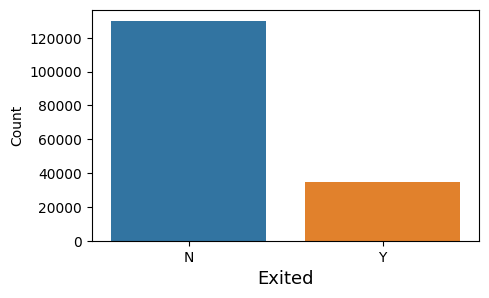

In [ ]:
# Number of churned members
plt.figure(figsize=(5, 3))
sns.countplot(x='Exited', data=data)
plt.xlabel('Exited', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.ylabel('Count')
plt.show()

- Leavers are 1/4 the size of existing members

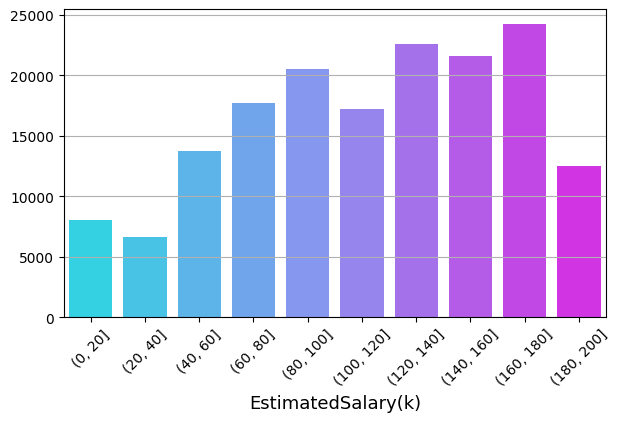

In [ ]:
# Estimated salary distribution
# Show in thousands
train.loc[:, 'EstimatedSalary_thousands'] = train['EstimatedSalary'] / 1000

salary_bins = pd.cut(train['EstimatedSalary_thousands'], bins=[0,20,40,60,80,100,120,140,160,180,200])
salary_bin_counts = salary_bins.value_counts().sort_index()

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=salary_bin_counts.index.astype(str), y=salary_bin_counts.values, palette='cool')

plt.xticks(rotation=45)
plt.xlabel('EstimatedSalary(k)', fontsize=13)
plt.grid(axis='y')
plt.show()

### 1.2 Churn Age Analysis <a class='anchor' id='ch1.2'></a>
- We decided that if we detected significant churn in a particular age group, we would target that age group.

In [ ]:
# Calculate churn rate by age group
def create_age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    elif age < 70:
        return '60s'
    else:
        return '70s up'

train['AgeGroup'] = train['Age'].apply(create_age_group)

AgeGroup = ['10s', '20s', '30s', '40s', '50s', '60s', '70s up']
for i in AgeGroup:
    AgeExited = train.loc[(train['AgeGroup'] == i) & (train['Exited'] == 1) , :].shape[0]
    AgeData = train.loc[train['AgeGroup'] == i].shape[0]
    print(i, round(AgeExited / AgeData, 3))

10s 0.102
20s 0.083
30s 0.108
40s 0.348
50s 0.609
60s 0.388
70s up 0.164


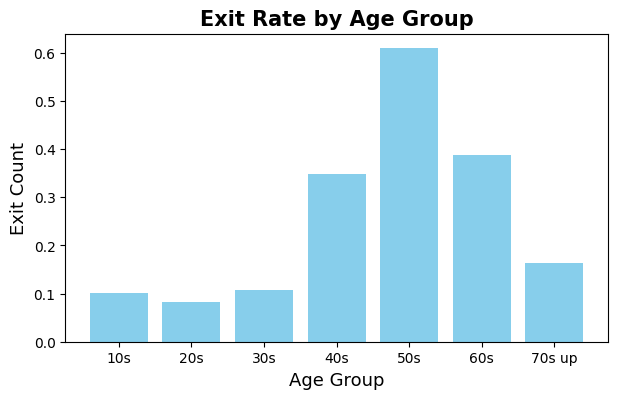

In [ ]:
# Visualize churn rate by age group
AgeGroup = ['10s', '20s', '30s', '40s', '50s', '60s', '70s up']
AgeExitRates = []

for i in AgeGroup:
    AgeExited = train.loc[(train['AgeGroup'] == i) & (train['Exited'] == 1) , :].shape[0]
    AgeData = train.loc[train['AgeGroup'] == i].shape[0]
    exit_rate = round(AgeExited / AgeData, 3) if AgeData > 0 else 0
    AgeExitRates.append(exit_rate)


plt.figure(figsize=(7, 4))
plt.bar(AgeGroup, AgeExitRates, color='skyblue')
plt.title('Exit Rate by Age Group', fontsize=15, fontweight='bold')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Exit Count', fontsize=13)
plt.show()



-  People in their 50s have the highest churn rate of all customers, so we set them as our target audience.
- Conduct a deeper analysis of your target audience.
- When we looked at the data earlier, we saw a high percentage of data with a balance of 0, which we thought might affect our analysis, so we removed the data with a balance of 0 from our deeper analysis.

# 2. Detailed Plan Establishment <a class='anchor' id='ch2'></a>
- **Target group**: 50s & non-zero balance customers

In [ ]:
# Non-zero balance customers
data_ybal = data.loc[data['Balance'] != 0, :]
data.shape[0]
data_ybal.shape[0]

75386

In [ ]:
# Generating a derived variable by Age
data_ybal['AgeGroup'] = pd.cut(data_ybal['Age'], bins = [10, 20, 30, 40, 50, 60, 70, 100],
                        labels=['10s', '20s', '30s', '40s', '50s', '60s', '70s up'],
                        include_lowest=True, right = False)
data_ybal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75386 entries, 3 to 165032
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      75386 non-null  int64   
 1   Gender           75386 non-null  object  
 2   Age              75386 non-null  float64 
 3   Tenure           75386 non-null  int64   
 4   Balance          75386 non-null  float64 
 5   NumOfProducts    75386 non-null  int64   
 6   HasCrCard        75386 non-null  float64 
 7   IsActiveMember   75386 non-null  float64 
 8   EstimatedSalary  75386 non-null  float64 
 9   Exited           75386 non-null  int64   
 10  AgeGroup         75386 non-null  category
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 6.4+ MB


/tmp/ipykernel_42/2553935184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ybal['AgeGroup'] = pd.cut(data_ybal['Age'], bins = [10, 20, 30, 40, 50, 60, 70, 100],


In [ ]:
# Customers in their 50s
data_ybal_50 = data_ybal.loc[data_ybal['AgeGroup'] == '50s', :]

In [ ]:
# Drop 'AgeGroup' as all customers of data_ybal_50 are in their 50s
data_ybal_50.drop('AgeGroup', axis=1, inplace=True)

dy5 = data_ybal_50
dy5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6782 entries, 18 to 165026
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6782 non-null   int64  
 1   Gender           6782 non-null   object 
 2   Age              6782 non-null   float64
 3   Tenure           6782 non-null   int64  
 4   Balance          6782 non-null   float64
 5   NumOfProducts    6782 non-null   int64  
 6   HasCrCard        6782 non-null   float64
 7   IsActiveMember   6782 non-null   float64
 8   EstimatedSalary  6782 non-null   float64
 9   Exited           6782 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 582.8+ KB


/tmp/ipykernel_42/3349346518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ybal_50.drop('AgeGroup', axis=1, inplace=True)


In [ ]:
!pip install pingouin

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/35/2e/8ca90e7edc93bc3d3bdf6daa6d5fc5ae4882994171c3db765365227e1d58/pingouin-0.5.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Correlation coefficient and p-value
import pingouin as pg
table = pg.rcorr(dy5, stars=False)
print(table)

                CreditScore     Age  Tenure Balance NumOfProducts HasCrCard  \
CreditScore               -   0.181   0.993   0.704         0.361     0.984   
Age                  -0.016       -   0.682   0.181         0.540     0.447   
Tenure                 -0.0   0.005       -   0.431         0.238     0.886   
Balance               0.005   0.016    0.01       -         0.255     0.208   
NumOfProducts         0.011  -0.007   0.014  -0.014             -     0.480   
HasCrCard              -0.0  -0.009  -0.002   0.015        -0.009         -   
IsActiveMember        0.028   0.097   -0.01  -0.014         0.013    -0.046   
EstimatedSalary      -0.007  -0.037   0.014   0.005         0.006     0.025   
Exited                -0.01  -0.057  -0.022   0.012        -0.014     0.023   

                IsActiveMember EstimatedSalary Exited  
CreditScore              0.021           0.591  0.406  
Age                      0.000           0.003  0.000  
Tenure                   0.421           

<Axes: >

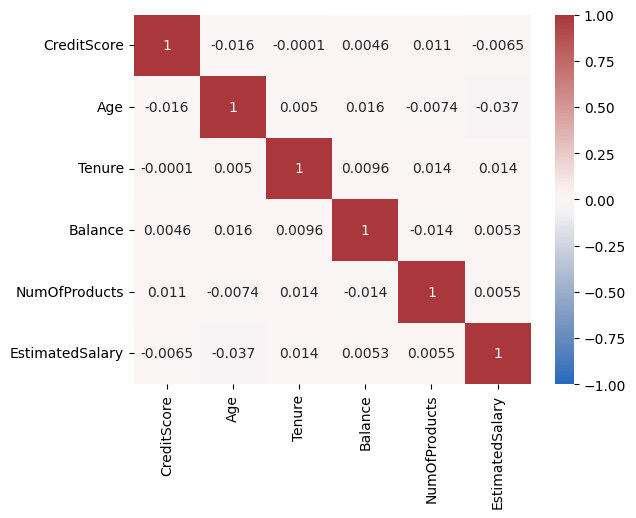

In [ ]:
# Correlation visualization
corr = dy5[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr()

import seaborn as sns
sns.heatmap(corr, vmin=-1, vmax=1, cmap='vlag', annot=True)

## 2.1 Deeper EDA<a class='anchor' id='ch2.1'></a>
- Conduct the deeper EDA focused on the target group we set

In [ ]:
dy5[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,6782.0,654.663963,81.552685,350.00,595.0000,653.000,711.0000,850.00
Age,6782.0,53.715128,2.850490,50.00,51.0000,53.000,56.0000,59.00
Tenure,6782.0,4.903716,2.836032,0.00,2.0000,5.000,7.0000,10.00
Balance,6782.0,122206.935370,24140.105111,3768.69,106929.4125,122217.105,137236.1375,238387.56
NumOfProducts,6782.0,1.316278,0.618806,1.00,1.0000,1.000,1.0000,4.00
EstimatedSalary,6782.0,113112.765506,50729.000683,11.58,73681.3800,119330.745,157391.9625,199775.67


In [ ]:
train['AgeGroup'].value_counts()

AgeGroup
30s       81253
40s       43319
20s       23202
50s       12186
60s        3920
70s up      822
10s         332
Name: count, dtype: int64

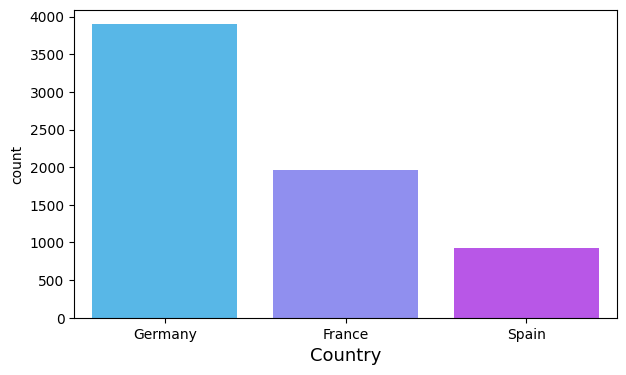

In [ ]:
dy5_0 = train.loc[(train['AgeGroup']=='50s') & (train['Balance']!=0)]

# Geographic distribution of 50 customers
plt.figure(figsize=(7, 4))
new_x_labels = ['Germany', 'France', 'Spain']
ax = sns.countplot(x='Geography', data=dy5_0, palette='cool')

plt.xlabel('Country', fontsize=13)
plt.xticks(range(len(new_x_labels)), new_x_labels)

plt.show()

- France is the most common overall customer, but Germany is the most common in their 50s.
- Germany also has the most customers in their 40s.
- However, the churn rate is also highest in Germany.
- France: Churn rate is about 48.6%, retention rate is about 51.4
- Germany: Churn rate is around 75.9%, retention rate is around 24.1
- Spain: bounce rate is around 51.5%, retention rate is around 48.5


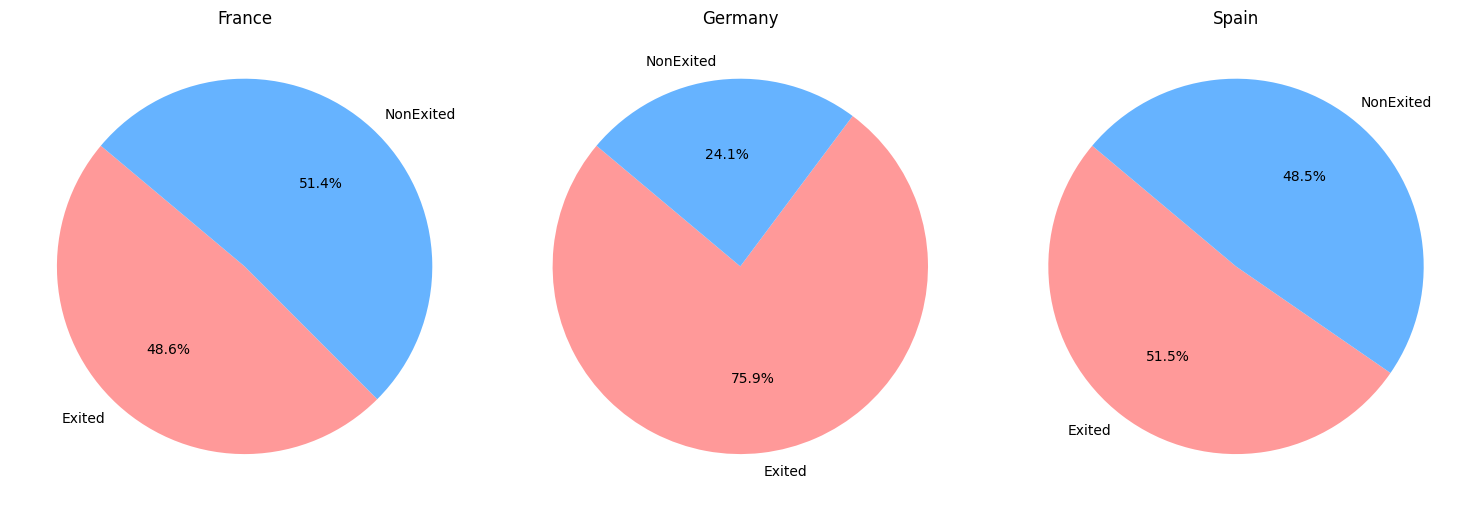

In [ ]:
labels = ['Exited', 'Stayed']
france_sizes = [48.6, 51.4]
germany_sizes = [75.9, 24.1]
spain_sizes = [51.5, 48.5]
colors = ['#ff9999','#66b3ff']

# Generating pie chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart of France
axs[0].pie(france_sizes, labels=['Exited', 'NonExited'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('France')

# Pie chart of Germany
axs[1].pie(germany_sizes, labels=['Exited', 'NonExited'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Germany')

# Pie chart of Spain
axs[2].pie(spain_sizes, labels=['Exited', 'NonExited'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Spain')

plt.tight_layout()
plt.show()

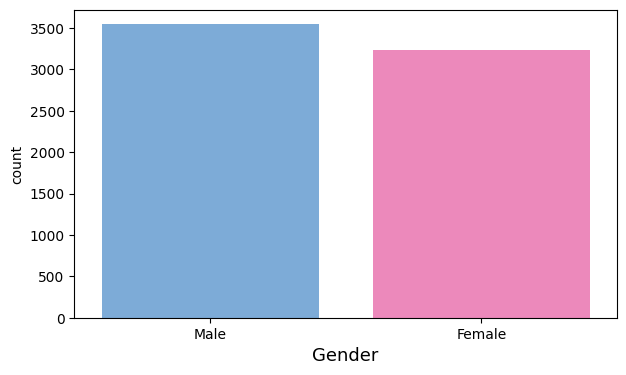

In [ ]:
# 50s Gender Distribution
plt.figure(figsize=(7, 4))
new_x_labels = ['Male', 'Female']
ax = sns.countplot(x='Gender', data=dy5_0, palette=['#6EACE6', '#FD78BB'])

plt.xlabel('Gender', fontsize=13)
plt.xticks(range(len(new_x_labels)), new_x_labels)
sns.set_style("whitegrid")
plt.show()

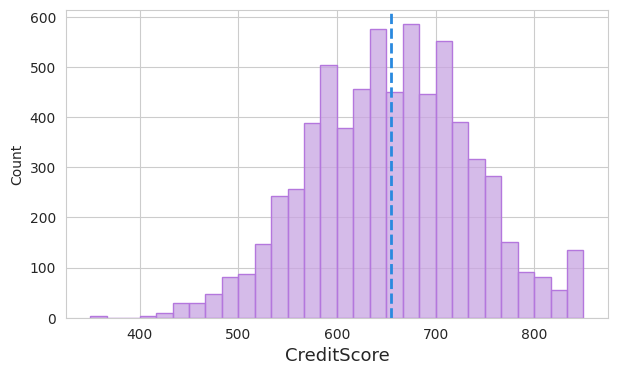

In [ ]:
# Credit score distribution in the 50s
plt.figure(figsize=(7, 4))
sns.histplot(dy5_0['CreditScore'], bins=30, color='#C8A4E2', edgecolor='#B477DD')

# Average line
plt.axvline(dy5_0['CreditScore'].mean(), color='#2989DF', linestyle='dashed', linewidth=2)

# Details
plt.xlabel('CreditScore', fontsize=13)
plt.grid(True)

plt.show()

- Not significantly different from the overall customer distribution

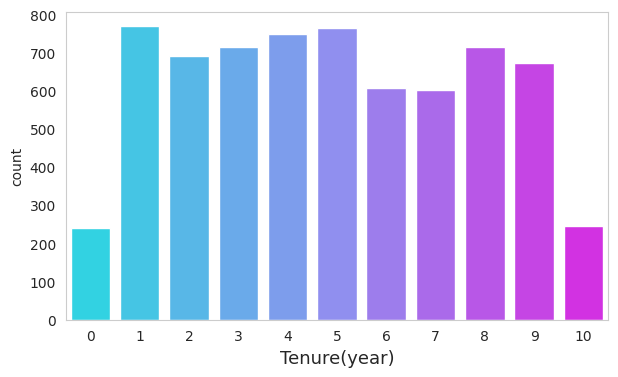

In [ ]:
# Tenure Distribution
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Tenure', data=dy5_0, palette='cool')
plt.xlabel('Tenure(year)', fontsize=13)
plt.grid(axis='y')
plt.show()

- Similarly, the overall customer distribution is similar.

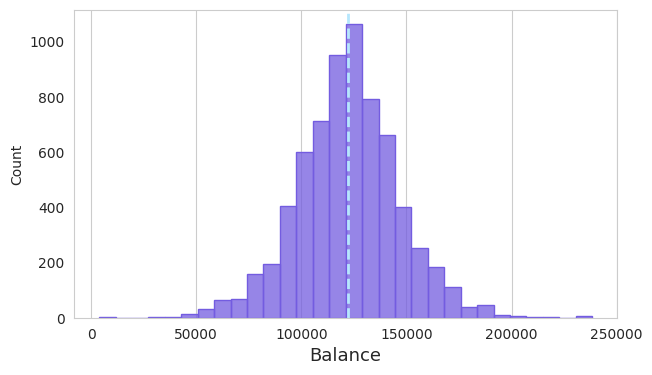

In [ ]:
# Balance distribution for customers with balances
plt.figure(figsize=(7, 4))
sns.histplot(dy5_0['Balance'], bins=30, color='#735CE0', edgecolor='#735CE0')

plt.axvline(dy5_0['Balance'].mean(), color='#B6E7FD', linestyle='dashed', linewidth=2)
plt.xlabel('Balance', fontsize=13)
plt.grid(axis='y')
plt.show()

- The average balance is approximately $122,206.94

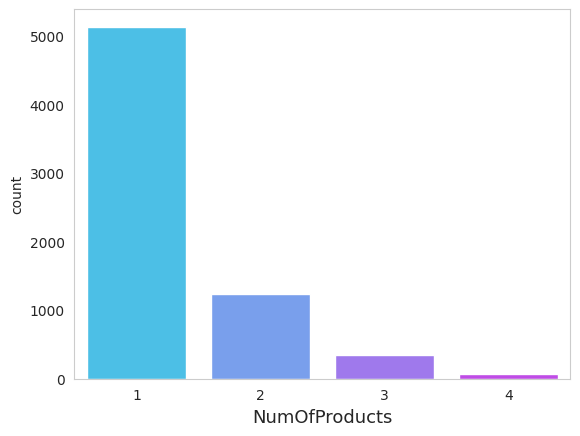

In [ ]:
# Number of products used
sns.countplot(x='NumOfProducts', data=dy5_0, palette='cool')

plt.grid(axis='y')
plt.xlabel('NumOfProducts', fontsize=13)
plt.show()

- Have an average of 1.3
- Compared to other customer segments, there are a lot of customers who only use one.
- Those in their 50s have 1.31, and those outside of their 50s have 1.57 (analyzed only among churners)

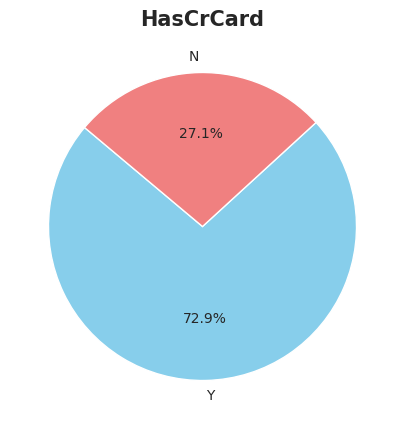

In [ ]:
# Whether customers have a credit card
card_counts = dy5_0['HasCrCard'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(card_counts, labels=['Y', 'N'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('HasCrCard', fontsize=15, fontweight='bold')
plt.show()

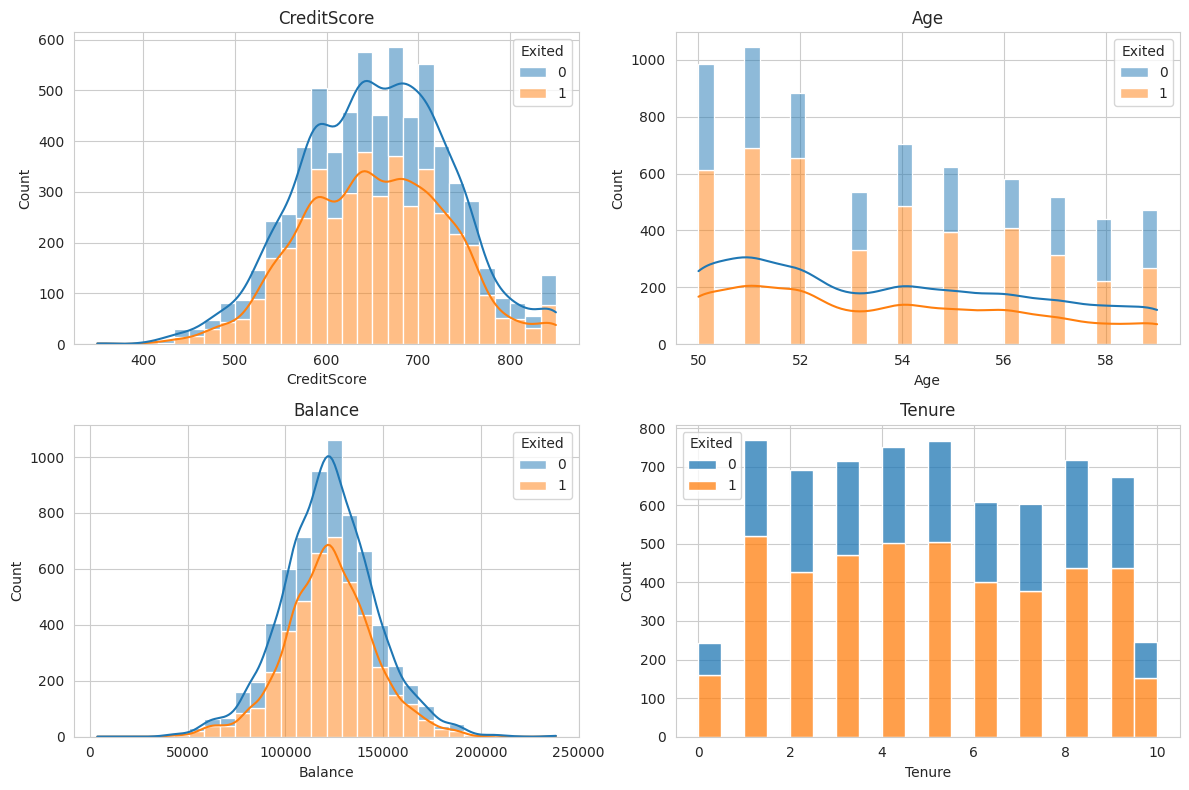

In [ ]:
data_nonzero_balance = dy5_0[dy5_0['Balance'] != 0]


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data_nonzero_balance, x='CreditScore', hue='Exited', kde=True, multiple='stack', bins=30)
plt.title('CreditScore')
plt.subplot(2, 2, 2)
sns.histplot(data_nonzero_balance, x='Age', hue='Exited', kde=True, multiple='stack', bins=30)
plt.title('Age')
plt.subplot(2, 2, 3)
sns.histplot(data_nonzero_balance, x='Balance', hue='Exited', kde=True, multiple='stack', bins=30)
plt.title('Balance')
plt.subplot(2, 2, 4)
sns.histplot(data_nonzero_balance, x='Tenure', hue='Exited', kde=False, multiple='stack', bins=20)
plt.title('Tenure')


plt.tight_layout()
plt.show()

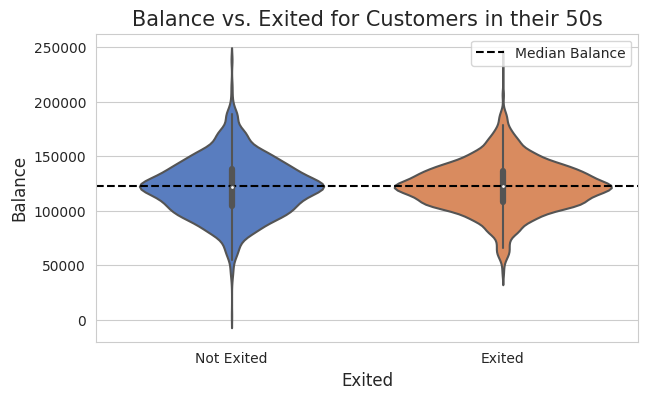

In [ ]:
# Visualize churn rate by account balance (Violin Plot)
plt.figure(figsize=(7, 4))
sns.violinplot(x='Exited', y='Balance', data=dy5_0, palette="muted", split=True)
plt.axhline(y=dy5_0['Balance'].median(), color='black', linestyle='--', label='Median Balance')
plt.title('Balance vs. Exited for Customers in their 50s', fontsize=15)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.legend()
plt.show()

In [ ]:
# Create a derivative variable
 # Derivative variable based on balance
import numpy as np
count1, bin_dividers1 = np.histogram(dy5['Balance'], bins=3)
a1 = np.linspace(dy5['Balance'].min(), dy5['Balance'].max(), 4)

dy5['BalLevel'] = pd.cut(dy5['Balance'], bins = bin_dividers1, include_lowest=True, labels=['Low','Mid', 'High'])
dy5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6782 entries, 18 to 165026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      6782 non-null   int64   
 1   Gender           6782 non-null   object  
 2   Age              6782 non-null   float64 
 3   Tenure           6782 non-null   int64   
 4   Balance          6782 non-null   float64 
 5   NumOfProducts    6782 non-null   int64   
 6   HasCrCard        6782 non-null   float64 
 7   IsActiveMember   6782 non-null   float64 
 8   EstimatedSalary  6782 non-null   float64 
 9   Exited           6782 non-null   int64   
 10  BalLevel         6782 non-null   category
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 589.6+ KB


/tmp/ipykernel_42/3501118100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dy5['BalLevel'] = pd.cut(dy5['Balance'], bins = bin_dividers1, include_lowest=True, labels=['Low','Mid', 'High'])


# 3. Statistical Analysis <a class='anchor' id='ch3'></a>
- Performed a t-test for continuous independent variables and a chi-square test for categorical independent variables.

# 3.1 Sampled T-test<a class='anchor' id='ch3.1'></a>
- Frequency analysis of the dependent variable for each group shows a large difference in degrees, which affects the t-test.
- Proceed by sampling


- Test for differences in CreditScore to Balance in two populations with values of 0,1 in the Exited column.
- Remove 0 values in Balance
- 2Sample t-test is used for testing, ɑ=0.05
- Hypothesis
    - H0: The mean of the dependent variable between the Exited groups is the same.
    - H1: The mean of the dependent variable between the Exited groups is different.

In [ ]:
train_data = train[:]
nonzero=train_data[train_data['Balance']!=0].reset_index(drop=True)
df_0=nonzero.loc[nonzero['Exited']==0,['CreditScore','Age','Tenure','Balance']].reset_index()
df_1=nonzero.loc[nonzero['Exited']==1,['CreditScore','Age','Tenure','Balance']].reset_index()

In [ ]:
# CreditScore
import scipy.stats as stats
t, p=stats.ttest_ind(df_0.CreditScore,df_1.CreditScore)
t, p
if p < 0.05:
    print("Reject H0: There is a statistically significant difference between the two samples.")
else:
    print("Adopt H0: There is no statistically significant difference between the two samples.")

print(round(p,5))

Reject H0: There is a statistically significant difference between the two samples.
0.0


In [ ]:
# Age
t, p=stats.ttest_ind(df_0.Age,df_1.Age)
t, p

if p < 0.05:
    print("Reject H0: There is a statistically significant difference between the two samples.")
else:
    print("Adopt H0: There is no statistically significant difference between the two samples.")

print(round(p,5))

Reject H0: There is a statistically significant difference between the two samples.
0.0


In [ ]:
# Tenure
t, p=stats.ttest_ind(df_0.Tenure,df_1.Tenure)
t, p

if p < 0.05:
    print("Reject H0: There is a statistically significant difference between the two samples.")
else:
    print("Adopt H0: There is no statistically significant difference between the two samples.")

print(round(p,5))

Reject H0: There is a statistically significant difference between the two samples.
0.0


In [ ]:
# Balance
t, p=stats.ttest_ind(df_0.Balance,df_1.Balance)
t, p

if p < 0.05:
    print("Reject H0: There is a statistically significant difference between the two samples.")
else:
    print("Adopt H0: There is no statistically significant difference between the two samples.")
print(round(p,5))

Adopt H0: There is no statistically significant difference between the two samples.
0.06745


### 50s 2Sample T-test
- Deeper analysis by Exited group for those in their 50s with the highest churn rate
- Excludes values with a balance of 0
- No additional sampling because the number of samples is less than the previous experiment.
- Since the experiment is conducted on 50s, information on Age is included, so Age is not conducted.
- H0: The mean of the dependent variable is the same between the Exited groups.
- H1:Exited groups have different means for the dependent variable.


In [ ]:
def categorize_age(age):
    if age<20:
        return '10s'
    elif age<30:
        return '20s'
    elif age<40:
        return '30s'
    elif age<50:
        return '40s'
    elif age<60:
        return '50s'
    elif age<70:
        return '60s'
    else:
        return '70+'

train_data['Age_range']=train_data['Age'].apply(categorize_age)
nonzero=train_data[train_data['Balance']!=0].reset_index(drop=True)
df_0_50s=nonzero.loc[(nonzero['Exited']==0)&(nonzero['Age_range']=='50s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)
df_1_50s=nonzero.loc[(nonzero['Exited']==1)&(nonzero['Age_range']=='50s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)



/tmp/ipykernel_42/3268493343.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age_range']=train_data['Age'].apply(categorize_age)


In [ ]:
# CreditScore
t, p=stats.ttest_ind(df_0_50s.CreditScore,df_1_50s.CreditScore)
t, p

if p < 0.05:
    print("Reject H0: There is a statistically significant difference between the two samples.")
else:
    print("Adopt H0: There is no statistically significant difference between the two samples.")

print(round(p,5))

Adopt H0: There is no statistically significant difference between the two samples.
0.4056


In [ ]:
# Tenure
t, p=stats.ttest_ind(df_0_50s.Tenure,df_1_50s.Tenure)
t, p

if p < 0.05:
    print("Reject H0: There is a statistically significant difference between the two samples.")
else:
    print("Adopt H0: There is no statistically significant difference between the two samples.")

print(round(p,5))

Adopt H0: There is no statistically significant difference between the two samples.
0.06549


In [ ]:
# Balance
t, p=stats.ttest_ind(df_0_50s.Balance,df_1_50s.Balance)
t, p

if p < 0.05:
    print("Reject H0: There is a statistically significant difference between the two samples.")
else:
    print("Adopt H0: There is no statistically significant difference between the two samples.")

print(round(p,5))

Adopt H0: There is no statistically significant difference between the two samples.
0.30545


### Conclusion
- Overall, we found statistically significant differences in CreditScore, Age, and Tenure, with the exception of Balance. However, a deeper analysis of the 50s, the age group with the highest churn rate, shows that there is no significant difference between CreditScore, Tenure, and Balance for the 50s alone, so it is likely that there are other variables or external factors that determine whether or not a 50-year-old churns.


# 3.2 Chi-Square Test<a class='anchor' id='ch3.2'></a>
- This is done to ascertain whether there exists a relationship between two categorical variables.
- **We also binned the Balance variable into BalLevel to see if creating a derivative variable from a continuous variable that the t-test found to be unrelated changed the results.**
- The list of categorical variables in this data:
    **HasCrCard, IsActiveMember, Gender, BalLevel, Exited**

- H0(Null Hypothesis): The two categorical variables are independent.
- H1(Alternative Hypothesis): The two categorical variables are not independent.


In [ ]:
# Preprocessing
# One-hot Encoding
dy5_dm = pd.get_dummies(dy5, columns = ['Gender','BalLevel'], drop_first=True)

- Credit card and active member are already dichotomous categorical variables, so we don't perform one-hot encoding.

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(dy5_dm)
dy5_dm_sc = scaler.transform(dy5_dm)

dy5_dm_sc = pd.DataFrame(dy5_dm_sc)
dy5_dm_sc

dy5_dm_sc.columns = dy5_dm.columns

In [ ]:
dy5_dm_sc.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'BalLevel_Mid', 'BalLevel_High'],
      dtype='object')

In [ ]:
col = ['HasCrCard', 'IsActiveMember', 'Gender_Male','BalLevel_Mid', 'BalLevel_High']
for i in col:
    cross_data = pd.crosstab(index = dy5_dm_sc['Exited'], columns = dy5_dm_sc[i],
                             margins=False)

    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(cross_data)
    msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
    print(f'<Exited and {i}>')
    print(msg.format(chi2, p, dof))
    if p < 0.05:
        print('dependent')
    else:
        print('independent')
    # print(expected)
    print('---------------------------')

<Exited and HasCrCard>
Test Statistic: 3.512031760205843
p-value: 0.06092469740333798
Degree of Freedom: 1
independent
---------------------------
<Exited and IsActiveMember>
Test Statistic: 1120.6478183974805
p-value: 1.0745755752999843e-245
Degree of Freedom: 1
dependent
---------------------------
<Exited and Gender_Male>
Test Statistic: 125.66086885425042
p-value: 3.647868576993693e-29
Degree of Freedom: 1
dependent
---------------------------
<Exited and BalLevel_Mid>
Test Statistic: 16.26985373334803
p-value: 5.4930970109188514e-05
Degree of Freedom: 1
dependent
---------------------------
<Exited and BalLevel_High>
Test Statistic: 6.7278503581130025
p-value: 0.00949189234529965
Degree of Freedom: 1
dependent
---------------------------


- The following categorical variables were determined to be associated with the Exited variable based on the chi-square analysis.
    - IsActiveMember, Gender_Male, BalLevel
- Notably, the results of the t-test with Balance as a continuous variable were different from the results of the crosstabulation analysis with Balance as a categorical variable with bins.

# 4. Regression <a class='anchor' id='ch4'></a>
- In the preceding hypothesis testing step, it was verified that each variable did not exert a significant impact on the exit of customers in their 50s.
- In order to conduct regression analysis to apply what we've learned, we established a new continuous dependent variable called 'NumOfProducts'.
- Since 'Exited,' the primary subject of interest, is a categorical variable, it is emphasized that other testing methods such as the chi-square test should be employed.

In [ ]:
# Regression on NumOfProducts


X1 = dy5_dm_sc[['Age', 'BalLevel_Mid','BalLevel_High',
               'Tenure', 'CreditScore']]
y = dy5_dm_sc['NumOfProducts']

In [ ]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['variable'] = X1.columns
print(vif)

   VIF Factor       variable
0    2.570811            Age
1    9.666977   BalLevel_Mid
2    1.620981  BalLevel_High
3    3.720647         Tenure
4    9.466688    CreditScore


In [ ]:
import statsmodels.api as sm

X1_ad = sm.add_constant(X1)
model = sm.OLS(y, X1_ad).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          NumOfProducts   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.133
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.340
Time:                        02:15:52   Log-Likelihood:                 1086.0
No. Observations:                6782   AIC:                            -2160.
Df Residuals:                    6776   BIC:                            -2119.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1099      0.016      7.040

# 5. Conclusion<a class='anchor' id='ch5'></a>
- During the correlation visualization, the correlation coefficients between each variable were very low.
- The t-test showed that certain continuous variables did not have a significant impact on 50-something disengagement.
- The crosstabulation analysis showed that some categorical variables were influential.
- A new continuous dependent variable, NumOfProducts, was created to run the regression, but the model was not statistically significant, making it difficult to explain the relationship between each variable.

Banks are currently suffering from a large number of customer churn, resulting in a loss of trust and reduced revenues. In addition, the reduced likelihood of new product and event success due to a lack of active customers can have a significant impact on a bank's long-term growth strategy.
In particular, the loss of customers in the 50s and older, who tend to have higher balances and average annual salaries than other customers, can lead to a decrease in funding for the bank and a decrease in competitiveness.

Solutions include:

- Country-specific marketing
    - For example, offering cash back on beer for German customers.
    - Expected effect: Drive customer engagement, increase brand loyalty, and gain favorable perception against competitors.

- Leverage local flavor
    - You can organize a festival in collaboration with the local community.
    - Expected outcomes: Engage customers, strengthen brand image, build customer loyalty and long-term relationships

- Make banking affordable and easy for low-balance customers
    - Minimize the financial burden of low-balance customers due to their high churn rate.
    - Expected impact: Reduced financial burden, increased access to banking services, and attracted new customers

- Launch a product with higher interest on deposits
    - Reduce customer churn, increase retention, and attract new members by launching a product that offers higher interest on deposits, regardless of balance.
    - Expected impact: Reduced churn, increased retention, and an edge over competing banks.

- Offer retirement and pension management consulting
    - Tailor services for customers in their 50s and beyond to reduce churn among customers in their 50s, a group with a high churn rate, and attract new members.
    - Expected impact: Reducing customers' financial anxiety, building trust, increasing customer loyalty and bank credibility.

# 6. Project Evaluation <a class='anchor' id='ch6'></a>

- Disappointments
    - We did not establish a direction and plan for data analysis at the beginning, so it took a lot of time to analyze and verify various variables.

    - We selected 50 customers with high churn rate to analyze, but there is a regret that we did not find very close variables and focused too much on churn rate.

- Lessons learned
    - We liked the process of solving the project through collaboration and communication with our teammates, and it was a good growth process to review and understand what we learned.

    - Even though it was a small project, it was good to have this experience and it will help us in future projects.